# World Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.graph_objs as go
import ipywidgets as widgets
from IPython.display import display, clear_output
import geopandas as gpd
import warnings

# Loading the data to dataframe

In [2]:
df = pd.read_csv("world data.csv")
df.head()

Country Density Agricultural Land( %) Land Area(Km2)  Birth Rate  \
0  Afghanistan      60                58.10%       6,52,230       32.49   
1      Albania     105                43.10%         28,748       11.78   
2      Algeria      18                17.40%      23,81,741       24.28   
3      Andorra     164                40.00%            468        7.20   
4       Angola      26                47.50%      12,46,700       40.73   

  Co2-Emissions  Fertility Rate Forested Area (%)                GDP  \
0         8,672            4.47             2.10%   $19,101,353,833    
1         4,536            1.62            28.10%   $15,278,077,447    
2      1,50,006            3.02             0.80%  $169,988,236,398    
3           469            1.27            34.00%    $3,154,057,987    
4        34,693            5.52            46.30%   $94,635,415,870    

  Gross primary education enrollment (%)  Infant mortality  Life expectancy  \
0                                104.00%              47.9             64.5   
1                                107.00%               7.8             78.5   
2                                109.90%              20.1             76.7   
3                                106.40%               2.7              NaN   
4                                113.50%              51.6             60.8   

   Maternal mortality ratio Minimum wage  Physicians per thousand  \
0                     638.0       $0.43                      0.28   
1                      15.0       $1.12                      1.20   
2                     112.0       $0.95                      1.72   
3                       NaN       $6.63                      3.33   
4                     241.0       $0.71                      0.21   

    Population Unemployment rate Urban_population  
0  3,80,41,754            11.12%        97,97,273  
1    28,54,191            12.33%        17,47,593  
2  4,30,53,054            11.70%      3,15,10,100  
3       77,142               NaN           67,873  
4  3,18,25,295             6.89%      2,10,61,025

In [3]:
df.columns

Index(['Country', 'Density', 'Agricultural Land( %)', 'Land Area(Km2)',
       'Birth Rate', 'Co2-Emissions', 'Fertility Rate', 'Forested Area (%)',
       'GDP', 'Gross primary education enrollment (%)', 'Infant mortality',
       'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
       'Physicians per thousand', 'Population', 'Unemployment rate',
       'Urban_population'],
      dtype='object')

# Cleaning the data

In [4]:
df.dtypes

Country                                    object
Density                                    object
Agricultural Land( %)                      object
Land Area(Km2)                             object
Birth Rate                                float64
Co2-Emissions                              object
Fertility Rate                            float64
Forested Area (%)                          object
GDP                                        object
Gross primary education enrollment (%)     object
Infant mortality                          float64
Life expectancy                           float64
Maternal mortality ratio                  float64
Minimum wage                               object
Physicians per thousand                   float64
Population                                 object
Unemployment rate                          object
Urban_population                           object
dtype: object

In [5]:
df.shape

(195, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 195 non-null    object 
 1   Density                                 195 non-null    object 
 2   Agricultural Land( %)                   188 non-null    object 
 3   Land Area(Km2)                          194 non-null    object 
 4   Birth Rate                              189 non-null    float64
 5   Co2-Emissions                           188 non-null    object 
 6   Fertility Rate                          188 non-null    float64
 7   Forested Area (%)                       188 non-null    object 
 8   GDP                                     193 non-null    object 
 9   Gross primary education enrollment (%)  188 non-null    object 
 10  Infant mortality                        189 non-null    float6

In [7]:
df2=df.copy()

In [8]:
df2.sample(3)

Country Density Agricultural Land( %) Land Area(Km2)  \
73          Vatican City   2,003                   NaN              0   
177  Trinidad and Tobago     273                10.50%          5,128   
63               Georgia      57                34.50%         69,700   

     Birth Rate Co2-Emissions  Fertility Rate Forested Area (%)  \
73          NaN           NaN             NaN               NaN   
177       12.94        43,868            1.73            46.00%   
63        13.47        10,128            2.06            40.60%   

                  GDP Gross primary education enrollment (%)  \
73                NaN                                    NaN   
177  $24,100,202,834                                 106.20%   
63   $17,743,195,770                                  98.60%   

     Infant mortality  Life expectancy  Maternal mortality ratio Minimum wage  \
73                NaN              NaN                       NaN          NaN   
177              16.4             73.4                      67.0       $2.25    
63                8.7             73.6                      25.0       $0.05    

     Physicians per thousand Population Unemployment rate Urban_population  
73                       NaN        836               NaN              NaN  
177                     4.17  13,94,973             2.69%         7,41,944  
63                      7.12  37,20,382            14.40%        21,96,476

## Looking for null values

In [9]:
pd.isnull(df2).sum()

Country                                    0
Density                                    0
Agricultural Land( %)                      7
Land Area(Km2)                             1
Birth Rate                                 6
Co2-Emissions                              7
Fertility Rate                             7
Forested Area (%)                          7
GDP                                        2
Gross primary education enrollment (%)     7
Infant mortality                           6
Life expectancy                            8
Maternal mortality ratio                  14
Minimum wage                              45
Physicians per thousand                    7
Population                                 1
Unemployment rate                         19
Urban_population                           5
dtype: int64

In [10]:
df2.dropna(inplace = True)

In [11]:
df2.head()

Country Density Agricultural Land( %) Land Area(Km2)  Birth Rate  \
0  Afghanistan      60                58.10%       6,52,230       32.49   
1      Albania     105                43.10%         28,748       11.78   
2      Algeria      18                17.40%      23,81,741       24.28   
4       Angola      26                47.50%      12,46,700       40.73   
6    Argentina      17                54.30%      27,80,400       17.02   

  Co2-Emissions  Fertility Rate Forested Area (%)                GDP  \
0         8,672            4.47             2.10%   $19,101,353,833    
1         4,536            1.62            28.10%   $15,278,077,447    
2      1,50,006            3.02             0.80%  $169,988,236,398    
4        34,693            5.52            46.30%   $94,635,415,870    
6      2,01,348            2.26             9.80%  $449,663,446,954    

  Gross primary education enrollment (%)  Infant mortality  Life expectancy  \
0                                104.00%              47.9             64.5   
1                                107.00%               7.8             78.5   
2                                109.90%              20.1             76.7   
4                                113.50%              51.6             60.8   
6                                109.70%               8.8             76.5   

   Maternal mortality ratio Minimum wage  Physicians per thousand  \
0                     638.0       $0.43                      0.28   
1                      15.0       $1.12                      1.20   
2                     112.0       $0.95                      1.72   
4                     241.0       $0.71                      0.21   
6                      39.0       $3.35                      3.96   

    Population Unemployment rate Urban_population  
0  3,80,41,754            11.12%        97,97,273  
1    28,54,191            12.33%        17,47,593  
2  4,30,53,054            11.70%      3,15,10,100  
4  3,18,25,295             6.89%      2,10,61,025  
6  4,49,38,712             9.79%      4,13,39,571

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 193
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 141 non-null    object 
 1   Density                                 141 non-null    object 
 2   Agricultural Land( %)                   141 non-null    object 
 3   Land Area(Km2)                          141 non-null    object 
 4   Birth Rate                              141 non-null    float64
 5   Co2-Emissions                           141 non-null    object 
 6   Fertility Rate                          141 non-null    float64
 7   Forested Area (%)                       141 non-null    object 
 8   GDP                                     141 non-null    object 
 9   Gross primary education enrollment (%)  141 non-null    object 
 10  Infant mortality                        141 non-null    float6

## Converting the column type

In [13]:
columns_to_convert = ['Density', 'Agricultural Land( %)', 'Land Area(Km2)',
                      'Birth Rate', 'Co2-Emissions', 'Forested Area (%)',
                      'Fertility Rate', 'GDP',
                      'Gross primary education enrollment (%)',
                      'Infant mortality',
                      'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 
                      'Physicians per thousand', 
                      'Population', 
                      'Unemployment rate', 'Urban_population']
df2[columns_to_convert] = df2[columns_to_convert].applymap(lambda x: float(str(x).replace(',', '').replace('$', '').replace('%', '')))

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 193
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 141 non-null    object 
 1   Density                                 141 non-null    float64
 2   Agricultural Land( %)                   141 non-null    float64
 3   Land Area(Km2)                          141 non-null    float64
 4   Birth Rate                              141 non-null    float64
 5   Co2-Emissions                           141 non-null    float64
 6   Fertility Rate                          141 non-null    float64
 7   Forested Area (%)                       141 non-null    float64
 8   GDP                                     141 non-null    float64
 9   Gross primary education enrollment (%)  141 non-null    float64
 10  Infant mortality                        141 non-null    float6

<h1> Data Visualisation</h1>

# Bar Graphs of Top 20 Countries by Population, Area, GDP, Density

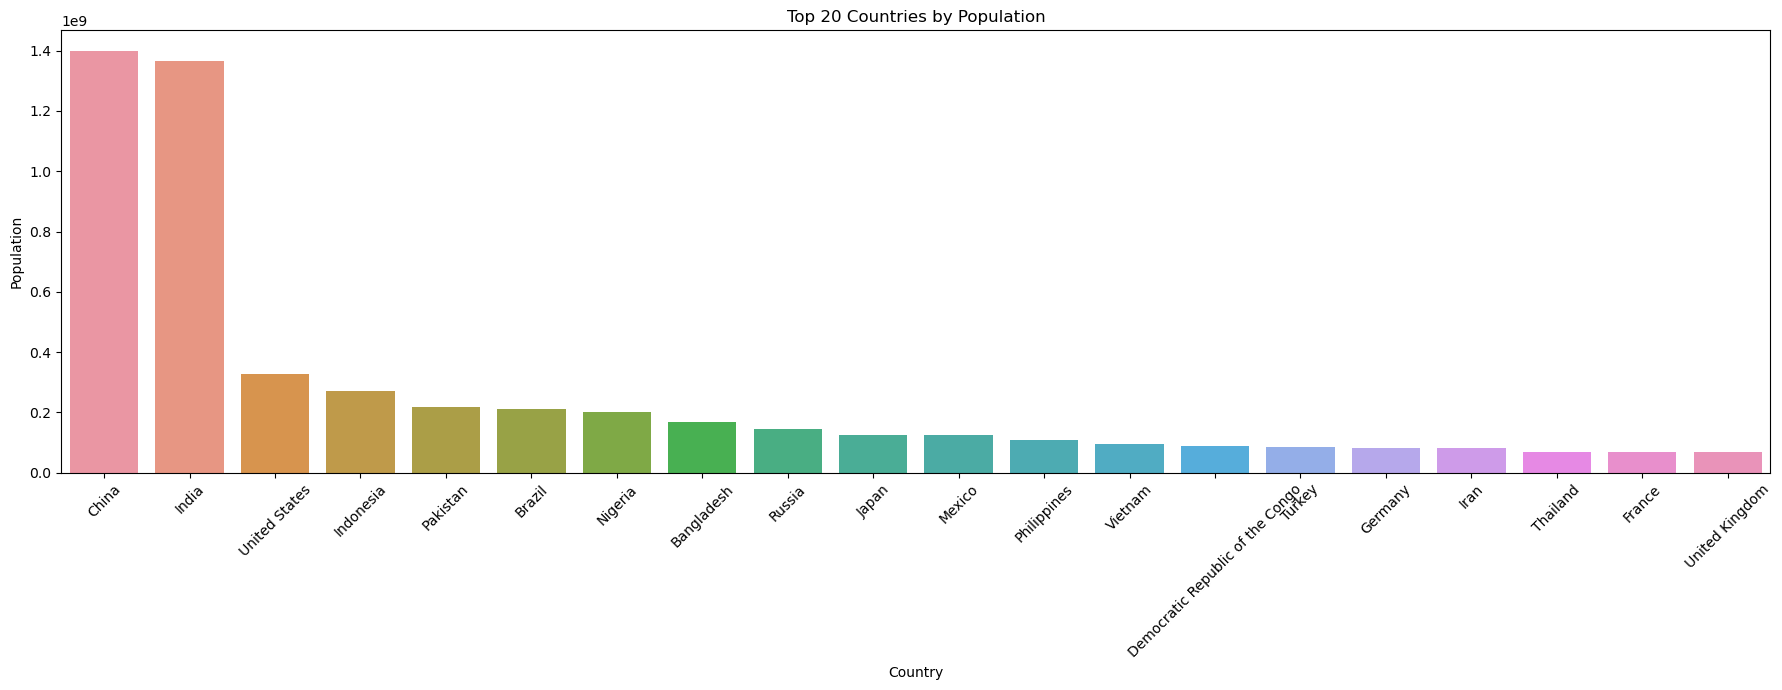

In [15]:
pop = df2.groupby(['Country'], as_index=False)['Population'].sum().sort_values(by='Population', ascending=False)
top_20 = pop.head(20)
plt.figure(figsize=(18, 7))
sns.barplot(data=top_20, x='Country', y='Population')
plt.xticks(rotation=45)
plt.title('Top 20 Countries by Population')
plt.xlabel('Country')
plt.ylabel('Population')
plt.tight_layout()
plt.show()

<h3>Insight</h3><br><p>The plot displays the top 20 countries with the <b>Highest Populations</b>. China and India have the two highest populations. The United States follows the two.</p>

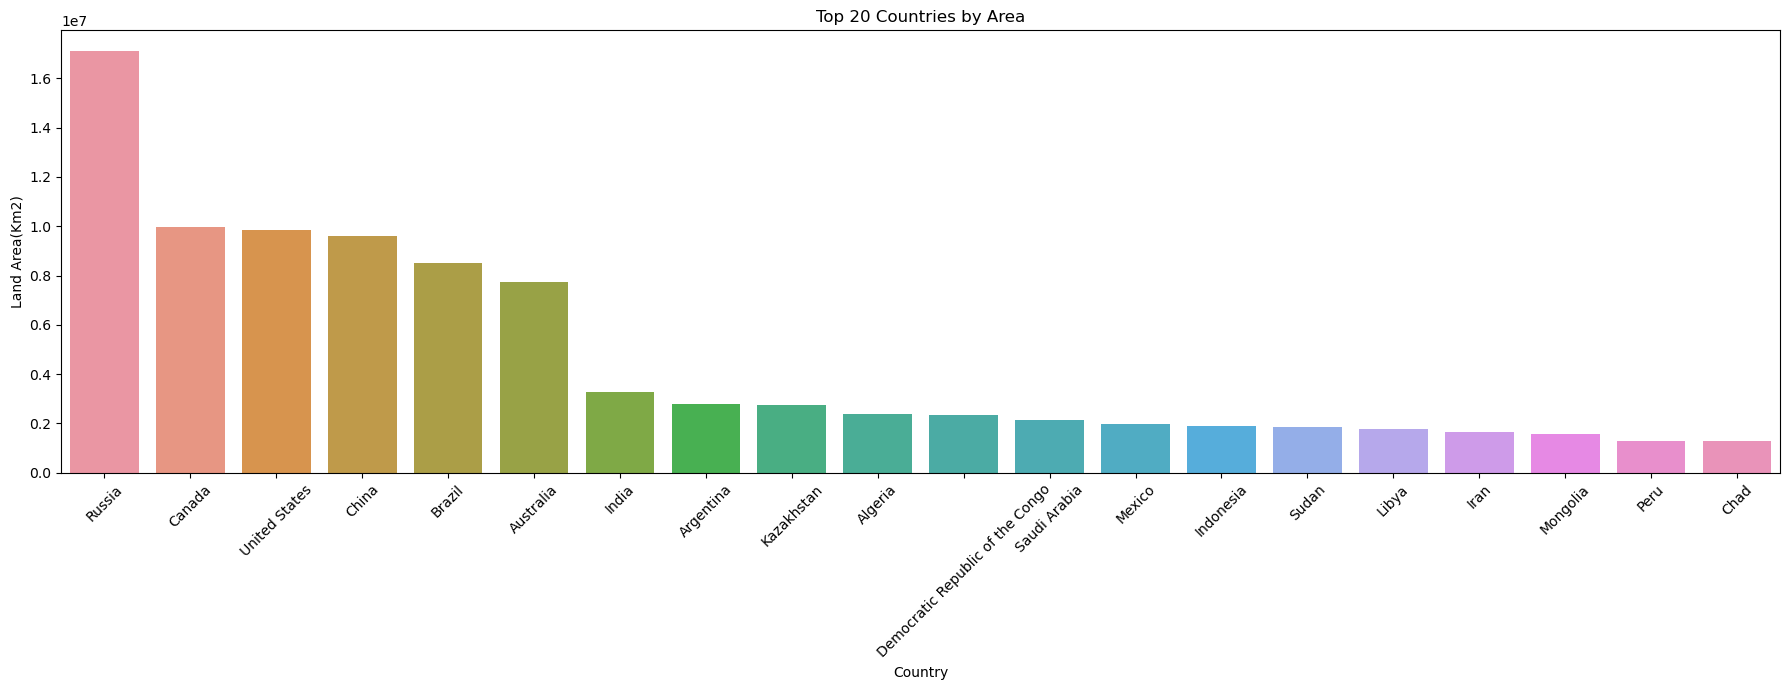

In [16]:
area = df2.groupby(['Country'], as_index=False)['Land Area(Km2)'].sum().sort_values(by='Land Area(Km2)', ascending=False)
top_20 = area.head(20)
plt.figure(figsize=(18, 7))
sns.barplot(data=top_20, x='Country', y='Land Area(Km2)')
plt.xticks(rotation=45)
plt.title('Top 20 Countries by Area')
plt.xlabel('Country')
plt.ylabel('Land Area(Km2)')
plt.tight_layout()
plt.show()

<h3>Insight</h3><br><p>The visualization showcases the <b>Land Area</b> distribution of the top 20 countries, highlighting Russia as the leader with the largest land area, followed by Canada, the United States, and China. This graphical representation effectively illustrates the significant geographical extent of these nations compared to others.</p>

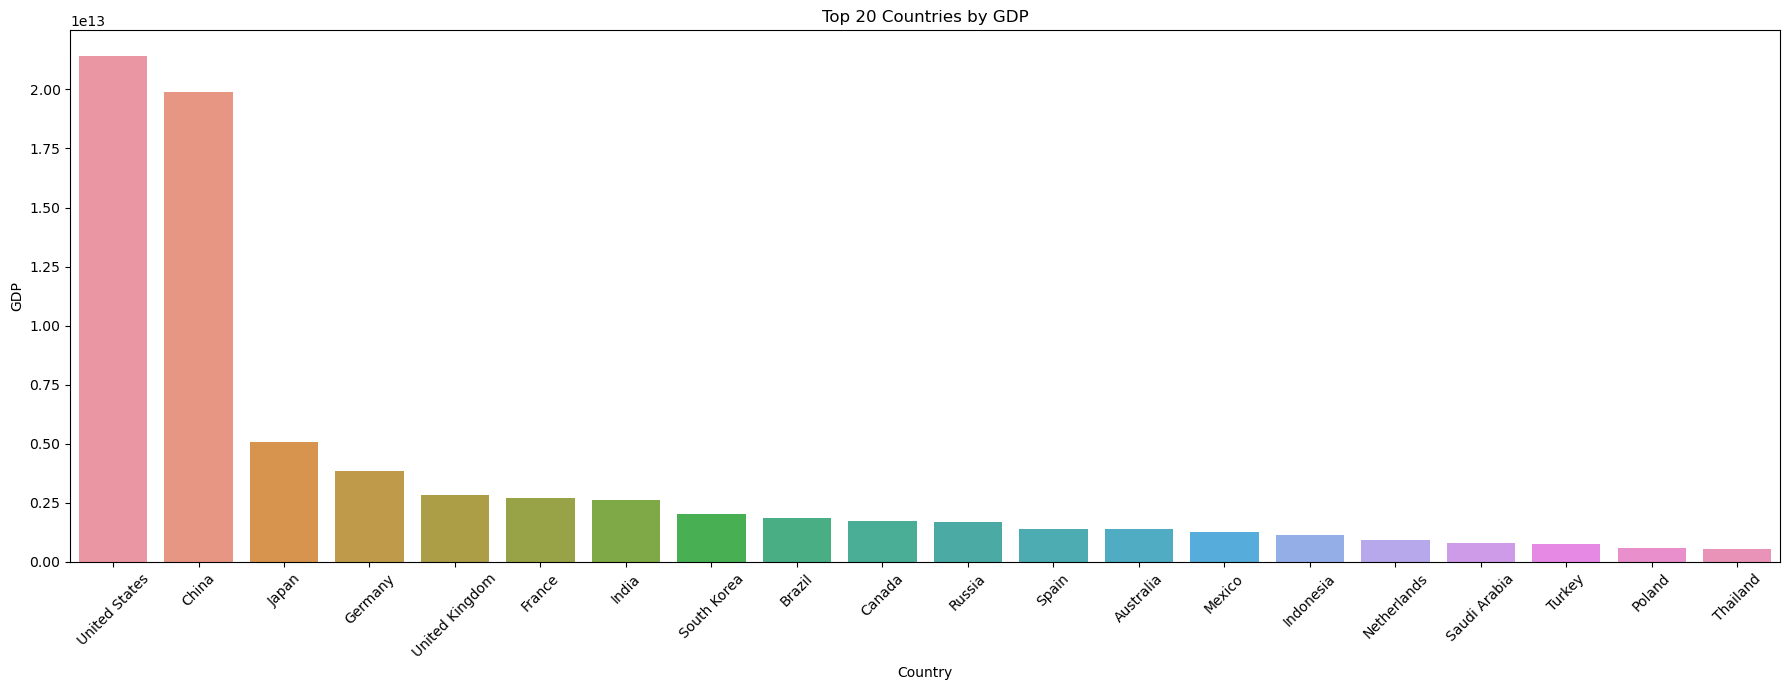

In [17]:
gdp = df2.groupby(['Country'], as_index=False)['GDP'].sum().sort_values(by='GDP', ascending=False)
top_20 = gdp.head(20)
plt.figure(figsize=(18, 7))
sns.barplot(data=top_20, x='Country', y='GDP')
plt.xticks(rotation=45)
plt.title('Top 20 Countries by GDP')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.tight_layout()
plt.show()

<h3>Insight</h3><br><p>A bar graph illustrates their <b>GDP values</b>, showcasing leading economies. The bar plot visualizes the top 20 countries with the highest Gross Domestic Product (GDP). The United States leads with the highest GDP, followed by China, Germany, and the United Kingdom, showcasing their significant economic strength. The graph offers a clear comparison of GDP values among these countries.</p>

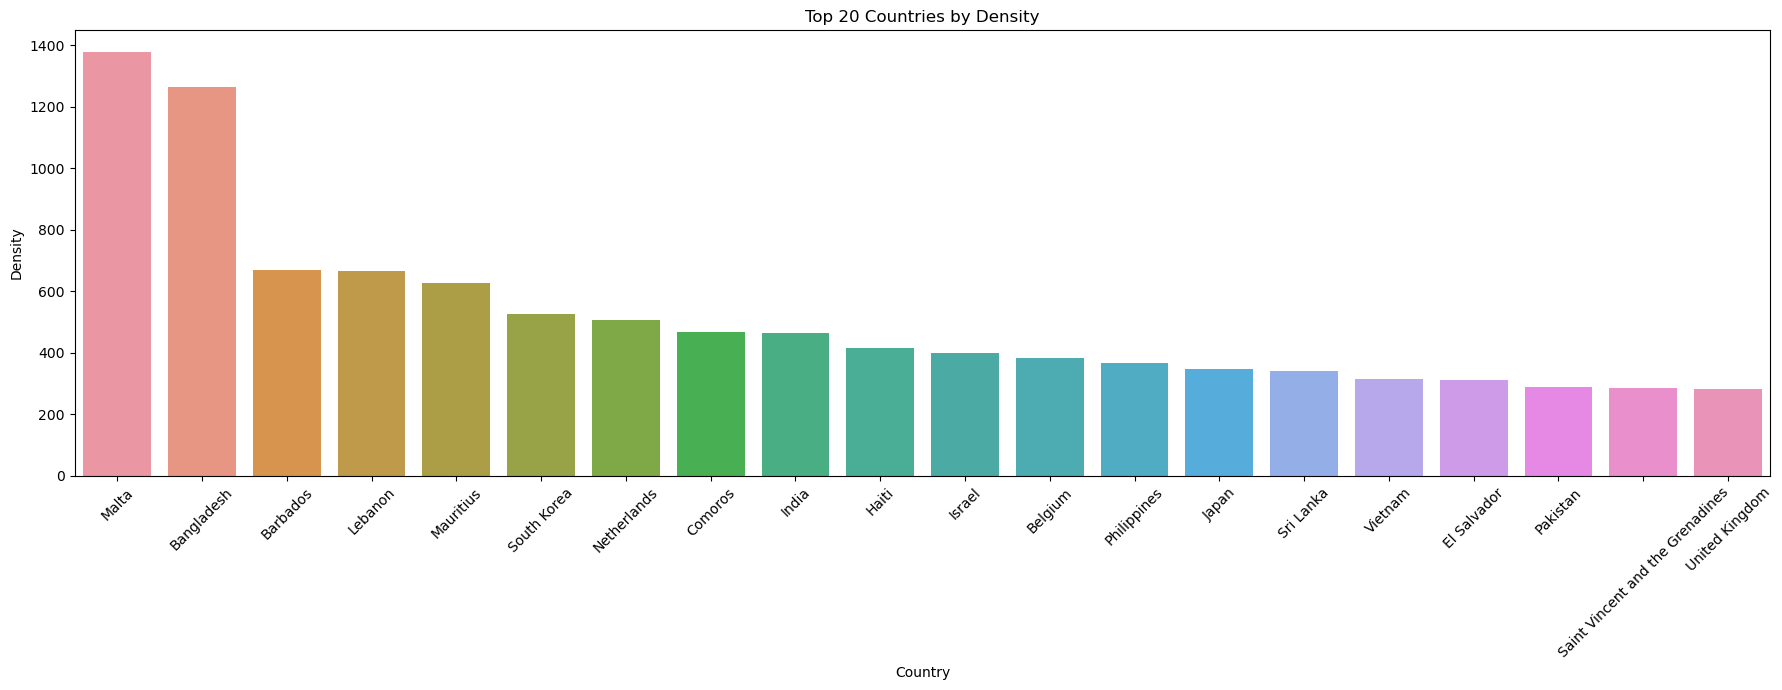

In [18]:
den = df2.groupby(['Country'], as_index=False)['Density'].sum().sort_values(by='Density', ascending=False)
top_20 = den.head(20)
plt.figure(figsize=(18, 7))
sns.barplot(data=top_20, x='Country', y='Density')
plt.xticks(rotation=45)
plt.title('Top 20 Countries by Density')
plt.xlabel('Country')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

<h3>Insight</h3><br><p>This is a bar graph plotted stating the top 20 Countries by the <b>Poplation Density</b>. The list is as follows Malta,Bangladesh,Barbados,Lebanon,Mauritius.</p>

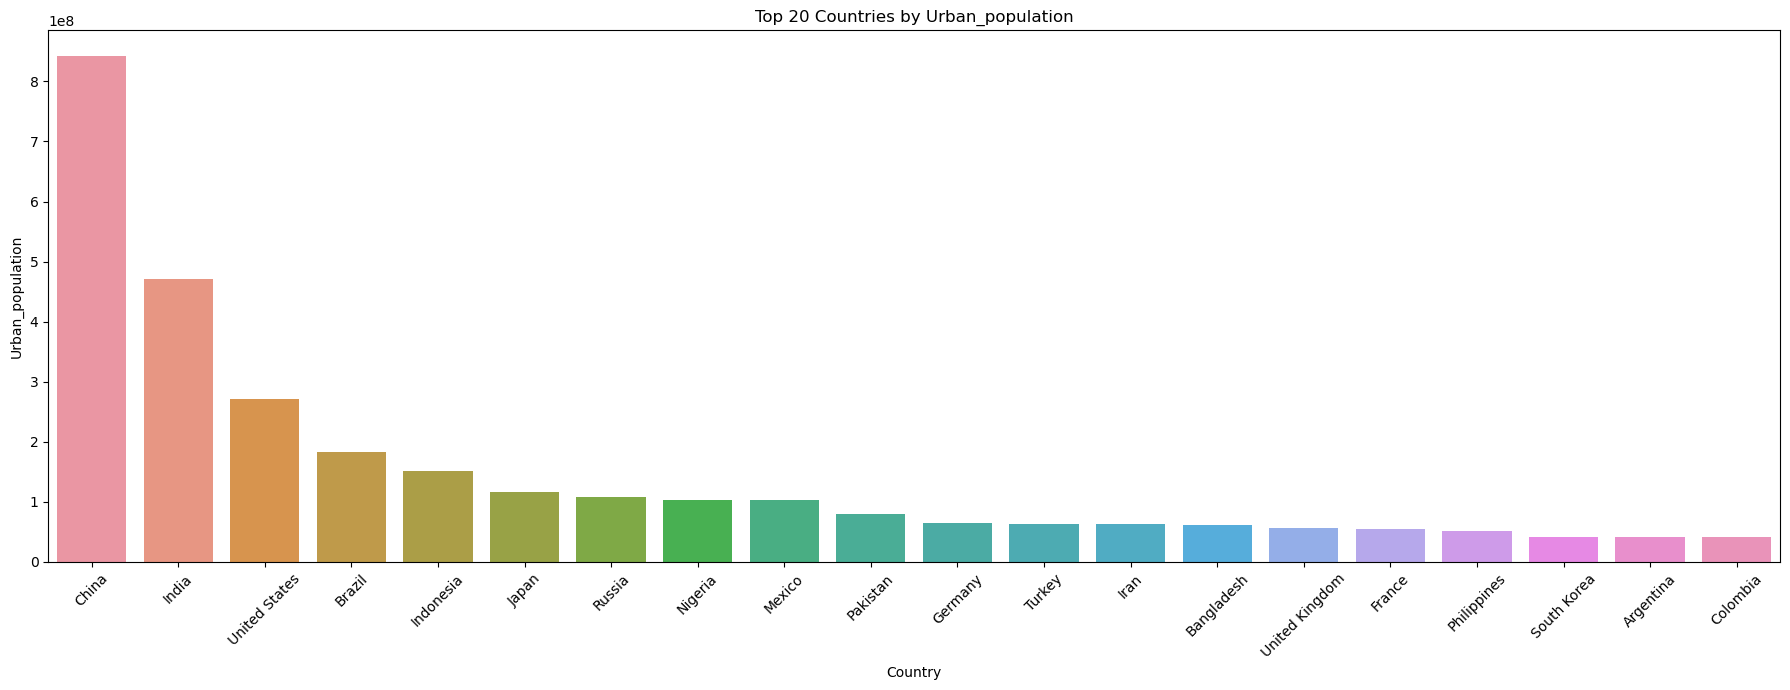

In [19]:
urb = df2.groupby(['Country'], as_index=False)['Urban_population'].sum().sort_values(by='Urban_population', ascending=False)
top_20 = urb.head(20)
plt.figure(figsize=(18, 7))
sns.barplot(data=top_20, x='Country', y='Urban_population')
plt.xticks(rotation=45)
plt.title('Top 20 Countries by Urban_population')
plt.xlabel('Country')
plt.ylabel('Urban_population')
plt.tight_layout()
plt.show()

<h3>Insight</h3><br><p>This is a bar graph plotted stating the top 20 Countries by the <b> Urban Population</b>. The list is as follows China,India,United States,Brazil,Indonesia.</p>

# Top 5 and Last 5 Countries in terms of Unemployment and Carbon Emission

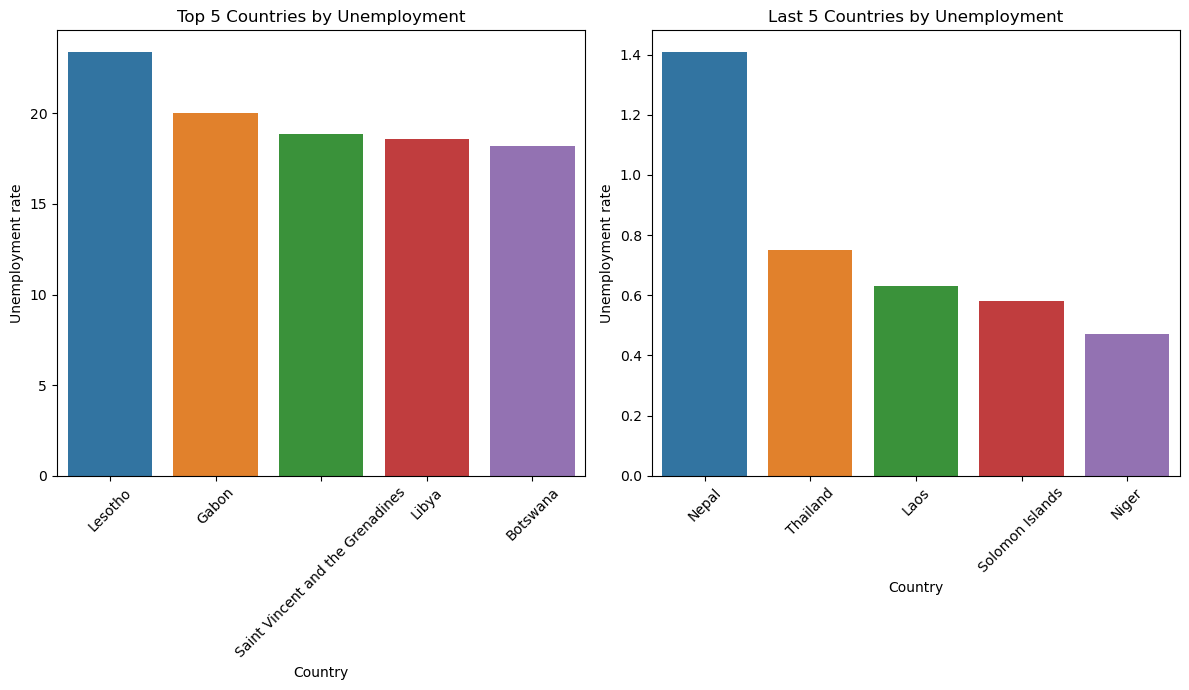

In [20]:
unemp = df2.groupby(['Country'], as_index=False)['Unemployment rate'].sum().sort_values(by='Unemployment rate', ascending=False)
top_5 = unemp.head(5)
low_5 = unemp.tail(5)
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
sns.barplot(data=top_5, x='Country', y='Unemployment rate', ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[0].set_title('Top 5 Countries by Unemployment')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Unemployment rate')
sns.barplot(data=low_5, x='Country', y='Unemployment rate', ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
axs[1].set_title('Last 5 Countries by Unemployment')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Unemployment rate')
plt.tight_layout()
plt.show()

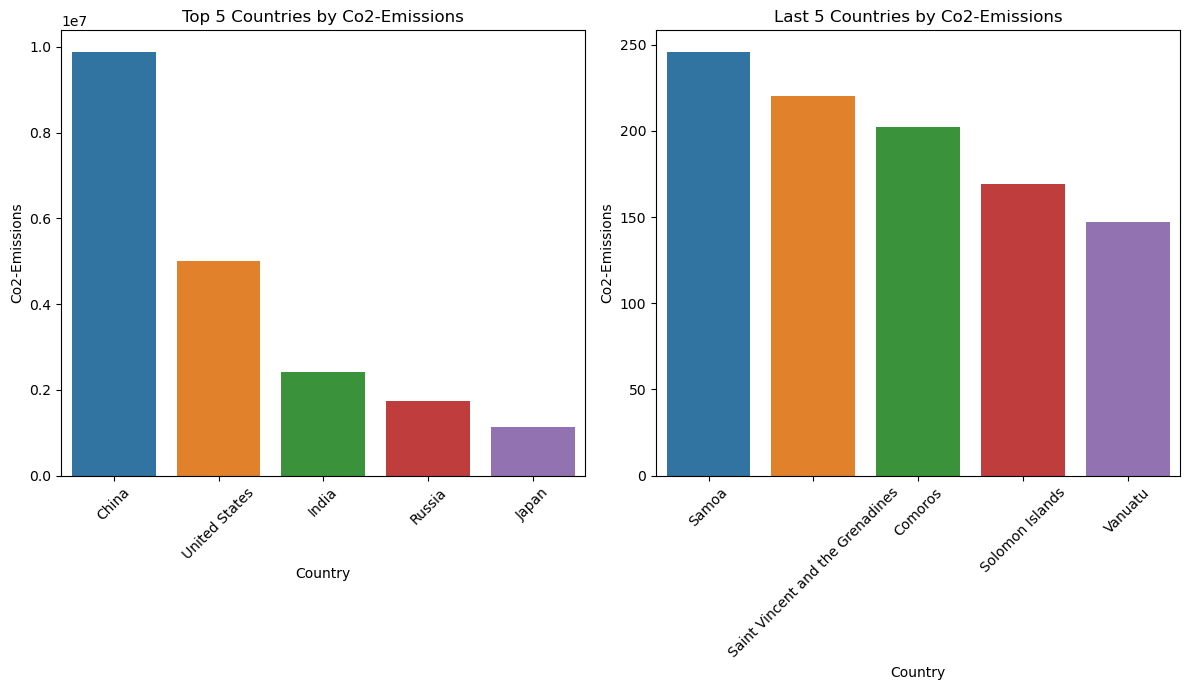

In [21]:
co2 = df2.groupby(['Country'], as_index=False)['Co2-Emissions'].sum().sort_values(by='Co2-Emissions', ascending=False)
top_5 = co2.head(5)
low_5 = co2.tail(5)
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
sns.barplot(data=top_5, x='Country', y='Co2-Emissions', ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[0].set_title('Top 5 Countries by Co2-Emissions')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Co2-Emissions')
sns.barplot(data=low_5, x='Country', y='Co2-Emissions', ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
axs[1].set_title('Last 5 Countries by Co2-Emissions')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Co2-Emissions')
plt.tight_layout()
plt.show()

# Scatter Plots for Birth Rate, Infant Mortality and Maternal Mortality

<Axes: xlabel='Birth Rate', ylabel='Infant mortality'>

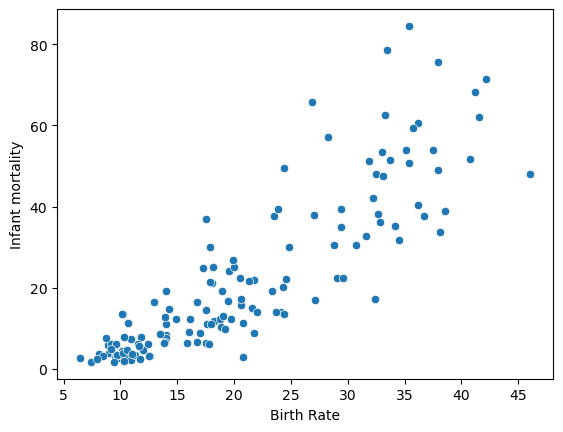

In [22]:
sns.scatterplot(x=df2['Birth Rate'], y=df2['Infant mortality'])

<h3>Insight</h3><p>The Scatter Plot is used to identify anomaly, in this graph we can see that with the increasing birth rate the is a increase in infant mortality rate but there are some exceptions that catch your eye.</p>

<Axes: xlabel='Birth Rate', ylabel='Maternal mortality ratio'>

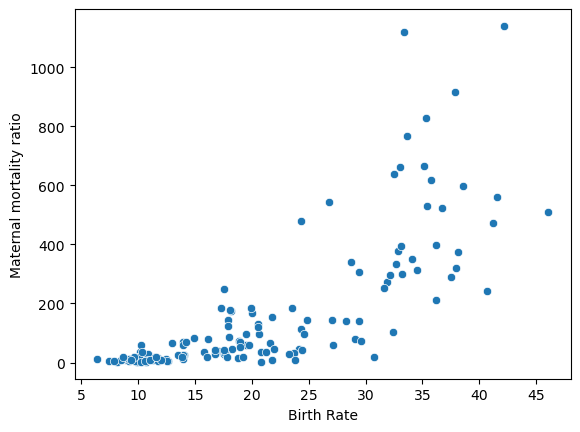

In [23]:
sns.scatterplot(x=df2['Birth Rate'], y=df2['Maternal mortality ratio'])

<h3>Insight</h3><p>In this graph we can observe that there is a steap increase in the Maternal Mortality Rate with the increase in Birth Rate but there are some exceptions too.</p>

<h1>World Maps</h1>

In [24]:
fig = px.choropleth(df2, locationmode="country names", locations=df2['Country'], color= 'Co2-Emissions' , projection="kavrayskiy7")
fig.show()
plt.close()

<p>World map indicating the carbon emission by countries annually</p>

In [25]:
fig = px.choropleth(df2, locationmode="country names", locations=df2['Country'], color= 'Life expectancy' , projection="kavrayskiy7")
fig.show()
plt.close()

<p>World map indicating the life expectancy around of differnt countries around the globe</p>

<h1>Heat Map</h1>

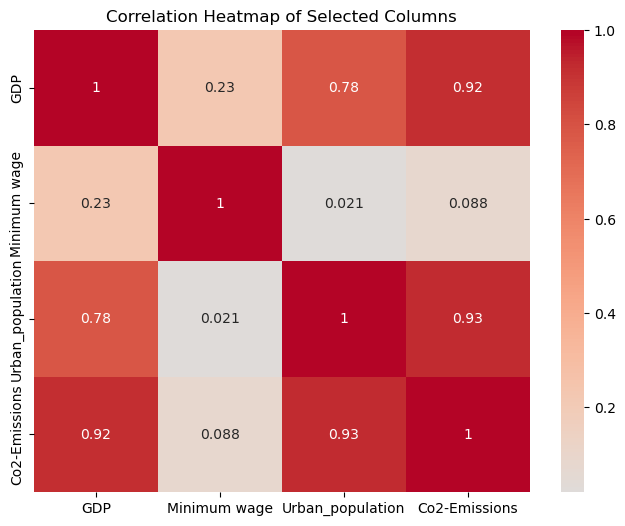

In [26]:
selected_columns = ['GDP', 'Minimum wage', 'Urban_population','Co2-Emissions']

# Extract the selected columns from the DataFrame
selected_data = df2[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()


<h3>Insight</h3>
<p>From the above graph we can say that with increasing GDP there is an increase in minimum wages, Urban Population and Carbon Emission. A well to do economy is achived by industrialisation that can be a reason for more CO2 Emission as well as Urban Population.</p>

# Using this dropdown menu se can have a look on all the statistical data of selected country.

In [27]:
df2 = pd.read_csv("world data.csv")

# Create a dropdown widget for country selection
# Add the "Select Country" option at the top of the list
country_options = ['Select Country'] + list(df2['Country'])
country_dropdown = widgets.Dropdown(options=country_options, description='Select Country:')

# Create an output widget for displaying the table
output_table = widgets.Output()

# Function to update the displayed table based on the selected country
def update_table(change):
    selected_country = change['new']
    
    # Skip if "Select Country" is chosen
    if selected_country == 'Select Country':
        return
    
    
    
    country_data = df2[df2['Country'] == selected_country]
    
    # Clear previous output and display the table
    with output_table:
        clear_output(wait=True)
        display(country_data)

# Attach the function to the dropdown widget's 'observe' event
country_dropdown.observe(update_table, names='value')

# Display the dropdown widget and the output table widget
display(country_dropdown)
display(output_table)

Dropdown(description='Select Country:', options=('Select Country', 'Afghanistan', 'Albania', 'Algeria', 'Andor…

Output()

# With this I sum up my world EDA. The data used for analysis is correct as per my knowledge.